<a href="https://colab.research.google.com/github/Wincenttjoi/employee-data-visualization/blob/main/DAO2702code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as scst
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [2]:
url = 'https://raw.githubusercontent.com/Wincenttjoi/employee-data-visualization/main/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [19]:
# https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

df_numerical = df.select_dtypes("int")
df_numerical = df_numerical.join(df['Attrition'])
df_numerical
is_attrition = df['Attrition'] == 'Yes'
is_not_attrition = df['Attrition'] == 'No'
df_numerical.loc[is_attrition, 'Attrition'] = 1
df_numerical.loc[is_not_attrition, 'Attrition'] = 0
corr_list = []
colnames = []

y = df_numerical['Attrition'].astype(float)

for column in df_numerical:
  x=df_numerical[column]
  colnames.append(column)
  corr = pointbiserialr(list(x), list(y))
  corr_list.append(corr[0])
result = pd.concat([pd.DataFrame(corr_list), pd.DataFrame(colnames)], axis=1)
result = result.set_axis(['Correlation with Attrition', 'Factor'], axis=1, inplace=False)
result = result.sort_values('Correlation with Attrition', ascending=False).dropna()
result

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Correlation with Attrition,Factor
26,1.000000,Attrition
2,0.077924,DistanceFromHome
13,0.043494,NumCompaniesWorked
12,0.015170,MonthlyRate
15,0.002889,PerformanceRating
7,-0.006846,HourlyRate
5,-0.010577,EmployeeNumber
14,-0.013478,PercentSalaryHike
3,-0.031373,Education
24,-0.033019,YearsSinceLastPromotion


In [59]:
df_numerical['Attrition'] = df_numerical['Attrition'].astype(float)
corr_table = df_numerical.corr()
# drop na values
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], inplace=True)
corr_table.drop(labels=['EmployeeCount', 'StandardHours'], axis=1, inplace=True)
corr_table

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.010577
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481


In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
is_attr = df['Attrition'] == 'Yes'
is_not_attr = df['Attrition'] == 'No'

temp_is_attr = df[is_attr].groupby(['YearsAtCompany']).size().to_frame()
temp_is_not_attr = df[is_not_attr].groupby(['YearsAtCompany']).size().to_frame()
temp_df = pd.merge(temp_is_not_attr, temp_is_attr, on = 'YearsAtCompany',  how='outer').fillna(0)
print(temp_df)
# print(max(temp_df.index)) 
#print(temp_df.iloc[:,1])
# np.arange( min(df['Age']), max(df['Age']) + 1)

                  0_x   0_y
YearsAtCompany             
0                28.0  16.0
1               112.0  59.0
2               100.0  27.0
3               108.0  20.0
4                91.0  19.0
5               175.0  21.0
6                67.0   9.0
7                79.0  11.0
8                71.0   9.0
9                74.0   8.0
10              102.0  18.0
11               30.0   2.0
12               14.0   0.0
13               22.0   2.0
14               16.0   2.0
15               19.0   1.0
16               11.0   1.0
17                8.0   1.0
18               12.0   1.0
19               10.0   1.0
20               26.0   1.0
21               13.0   1.0
22               14.0   1.0
23                1.0   1.0
24                5.0   1.0
25                4.0   0.0
26                4.0   0.0
27                2.0   0.0
29                2.0   0.0
30                1.0   0.0
31                2.0   1.0
32                2.0   1.0
33                4.0   1.0
34                1.

In [ ]:
def linear_by_linear_test(col1, col2, u, v):
    matrix = [col1, col2]
    row_total = [a + b for a,b in zip(col1, col2)]
    col_total = [sum(col1), sum(col2)]
    n = sum(row_total)
    
    row_p = [x / n for x in row_total]
    ubar = sum([a*b for a,b in zip(row_p, u)])
    col_p = [x / n for x in col_total]
    vbar = sum([a*b for a,b in zip(col_p, v)])
    
    numerator = 0
    for i in range(len(u)):
        for j in range(len(v)):
            ui = u[i]
            vj = v[j]
            pij = matrix[j][i] / n
            numerator += (ui - ubar) * (vj - vbar) * pij

    
    denominator = (sum([row_p[i] * (u[i] - ubar)**2 for i in range(len(u))]) * \
                   sum([col_p[j] * (v[j] - vbar)**2 for j in range(len(v))]))**0.5
    
    r = numerator / denominator
    M = (n-1) * r**2
    p_value = 1- scst.chi2.cdf(M, 1)
    # return "M^2 (test statistic) is {} and two sided p-value is {}".format(M,p_value)
    return p_value

In [ ]:
print( temp_df.iloc[:,1].tolist())

linear_by_linear_test(temp_df.iloc[:,0].tolist(), temp_df.iloc[:,1].tolist(),  np.arange( min(temp_df.index), max(temp_df.index) + 1), [0,1])


[16.0, 59.0, 27.0, 20.0, 19.0, 21.0, 9.0, 11.0, 9.0, 8.0, 18.0, 2.0, 0.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]


IndexError: ignored

In [ ]:
df_numerical = df.select_dtypes("int")
df_numerical = df_numerical.join(df['Attrition'])

is_attr = df_numerical['Attrition'] == 'Yes'
is_not_attr = df_numerical['Attrition'] == 'No'

p_val_list = []
p_colnames = []
for column in df_numerical:
  
  if column == 'Attrition' or column == 'DailyRate' or column =='EmployeeNumber' or column == 'MonthlyIncome' or column == 'MonthlyRate' or column == 'TotalWorkingYears' or column  =='YearsAtCompany':
    continue

  print(column)
  temp_is_attr = df_numerical[is_attr].groupby([column]).size().to_frame()
  temp_is_not_attr = df_numerical[is_not_attr].groupby([column]).size().to_frame()
  temp_df = pd.merge(temp_is_not_attr, temp_is_attr, on = column,  how='outer').fillna(0)
  p_val = linear_by_linear_test(temp_df.iloc[:,0].tolist(), temp_df.iloc[:,1].tolist(),  np.arange( min(temp_df.index), max(temp_df.index) + 1), [0,1])

  p_colnames.append(column)
  p_val_list.append(p_val)

p_result = pd.concat([pd.DataFrame(p_val_list), pd.DataFrame(p_colnames)], axis=1)
p_result = p_result.set_axis(['P-val', 'Factor'], axis=1, inplace=False)
p_result = p_result.sort_values('P-val', ascending=False)
p_result

Age
DistanceFromHome
Education
EmployeeCount
EnvironmentSatisfaction
HourlyRate
JobInvolvement
JobLevel
JobSatisfaction
NumCompaniesWorked
PercentSalaryHike
PerformanceRating
RelationshipSatisfaction
StandardHours
StockOptionLevel
TrainingTimesLastYear
WorkLifeBalance
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


,P-val,Factor
11,9.118394e-01,PerformanceRating
5,7.930339e-01,HourlyRate
10,6.054450e-01,PercentSalaryHike
2,2.291920e-01,Education
18,2.056820e-01,YearsSinceLastPromotion
9,9.551285e-02,NumCompaniesWorked
12,7.871835e-02,RelationshipSatisfaction
15,2.262920e-02,TrainingTimesLastYear
16,1.426080e-02,WorkLifeBalance
1,2.820811e-03,DistanceFromHome


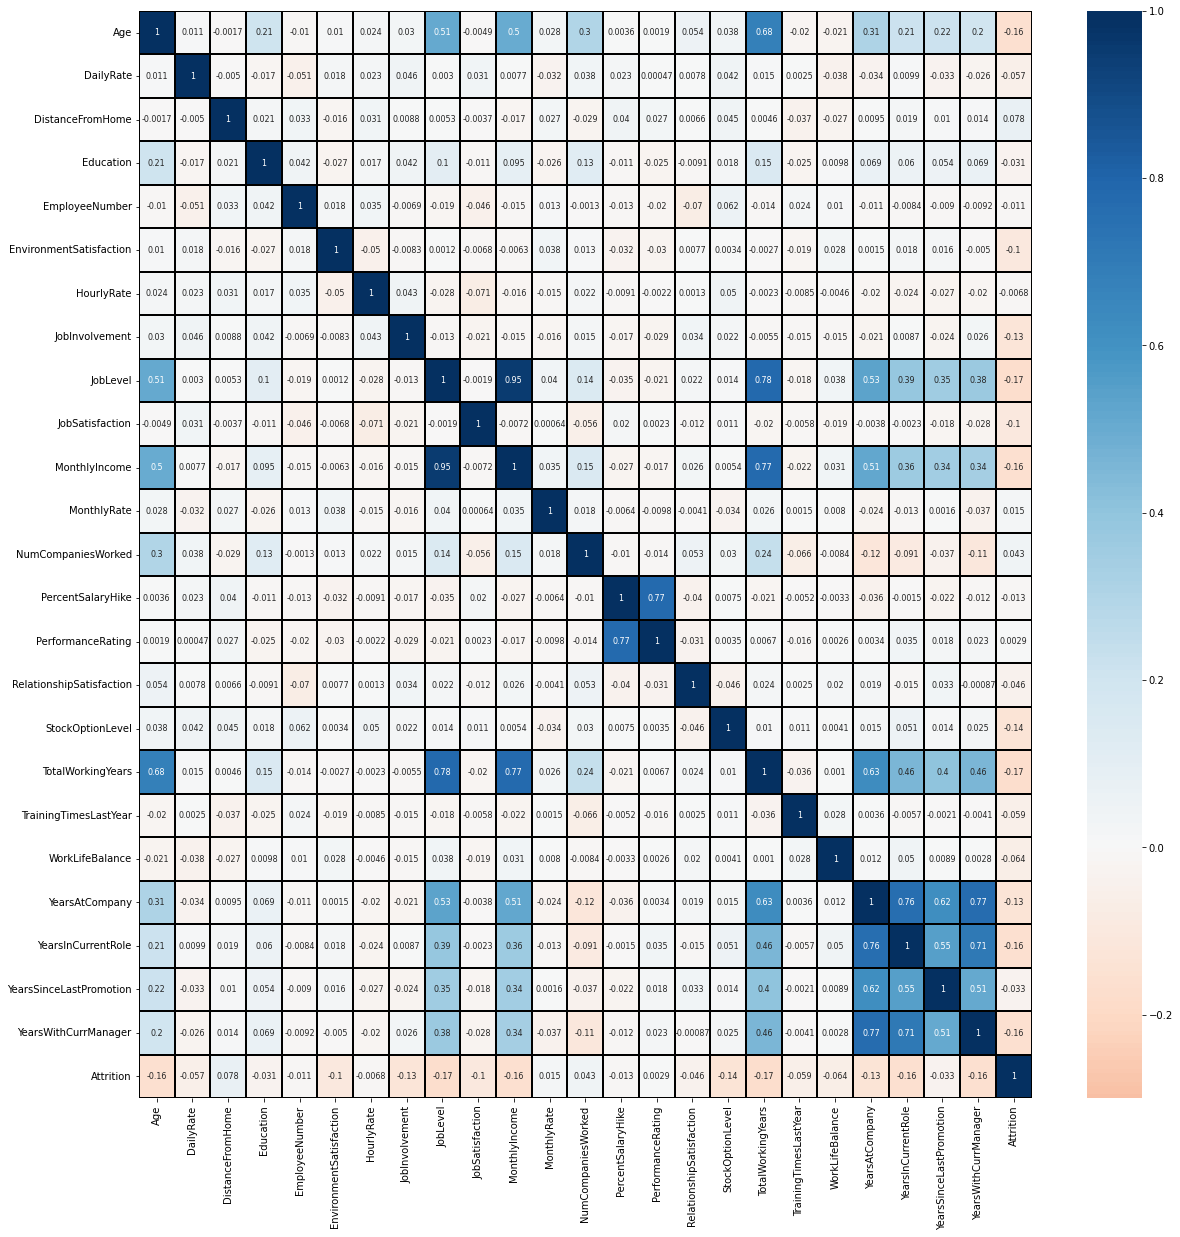

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_table, 
            annot=True, 
            cmap="RdBu", 
            center=0, 
            annot_kws={"size":8}, 
            vmin=-0.3, 
            vmax=1, 
            linewidth=1, 
            linecolor='black')
plt.show()